In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from datetime import datetime
from scipy.stats import kurtosis, skew
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima, ADFTest

es5m_df = pd.read_csv("C:\\Users\\Shuv\\Documents\\All Trading\\Market Data\\Research Data\\Chart_ES_TestData.csv")

nq5m_df = pd.read_csv("C:\\Users\\Shuv\\Documents\\All Trading\\Market Data\\Research Data\\Chart_NQ_Testdata.csv")

#es5m_df=nq5m_df

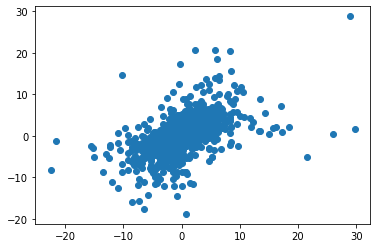

Correlation coeff of High vs Low 0.5345
High Vol period: High diff: mean=-0.018 stdv=3.423 skew=0.909 Kurtosis=12.000
High Vol period: Low Diff: mean=-0.018 stdv=3.375 skew=0.540 Kurtosis=8.431
[[11.72486543  6.17785582]
 [ 6.17785582 11.39400387]]


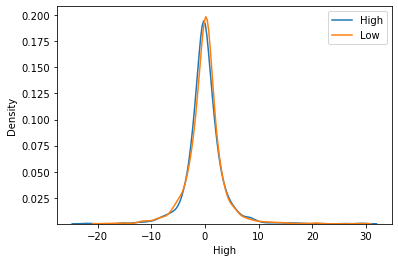

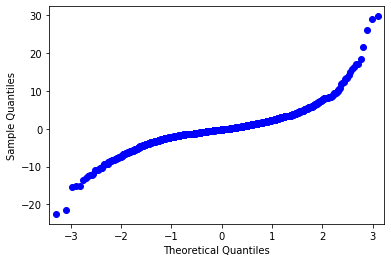

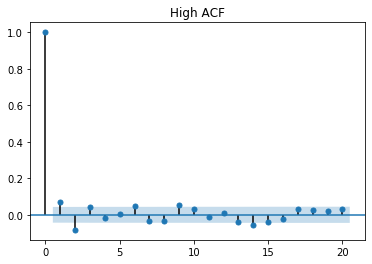

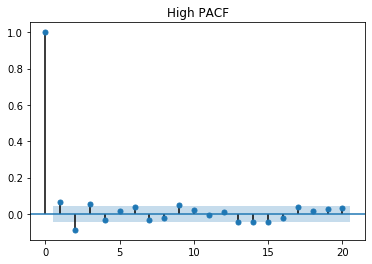

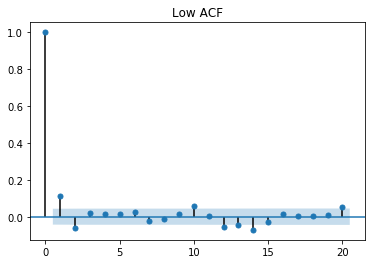

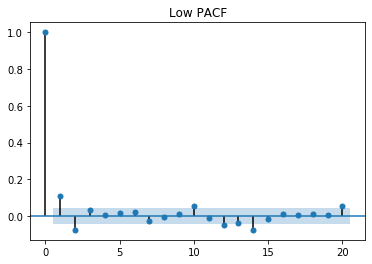

Statistics=nan, pHigh=1.0000
Statistics=nan, pLow=1.0000
High Sample looks Gaussian (fail to reject H0)
Low Sample looks Gaussian (fail to reject H0)
Statistics=nan, p=nan
Sample does not look Gaussian (reject H0)


C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1548: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


In [72]:
#Plot the change in High,Low,Close and see how the distribution looks(for all times)
# Visually all looks Normal/Gaussian (This might be our prior Distribution)
#es5m_df

#Check visually if the High & Low change are correlated : In excel it returns a corr_coeff= 0.55 which is moderately correlated
data1 = es5m_df['High'].diff().dropna(); data2 = es5m_df['Low'].diff().dropna(); 
pyplot.scatter(data1, data2)
pyplot.show()

print('Correlation coeff of High vs Low %.4f' % (np.corrcoef(data1,data2))[0,1])
# print('High diff: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
# print('Low Diff: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))

print('High Vol period: High diff: mean=%.3f stdv=%.3f skew=%.3f Kurtosis=%.3f' % (np.mean(data1), np.std(data1),skew(data1),kurtosis(data1)))
print('High Vol period: Low Diff: mean=%.3f stdv=%.3f skew=%.3f Kurtosis=%.3f' % (np.mean(data2), np.std(data2),skew(data2),kurtosis(data2)))


sns.kdeplot(es5m_df['High'].diff())
sns.kdeplot(es5m_df['Low'].diff())
#sns.kdeplot(es5m_df['Close'].diff())
plt.legend(labels = ['High','Low'])

print(np.cov(data1,data2))


qqplot(es5m_df['High'].diff(), line='s')
pyplot.show()

# Let's do some Auto-ARIMA test first

adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(data1)

plot_acf(data1.dropna(),lags=20 , title='High ACF')
plot_pacf(data1.dropna(),lags=20, title = 'High PACF')

plot_acf(data2.dropna(),lags=20, title = 'Low ACF')
plot_pacf(data2.dropna(),lags=20, title = 'Low PACF')
plt.show()    



#Run Normality test
datahigh = es5m_df['High'].diff()
datalow = es5m_df['Low'].diff()
# Shapiro normality test
stath, p_high = shapiro(datahigh)
statl, p_low = shapiro(datalow)
print('Statistics=%.3f, pHigh=%.4f' % (stath , p_high))
print('Statistics=%.3f, pLow=%.4f' % (statl , p_low))


# interpret
alpha = 0.05
if p_high > alpha:
    print('High Sample looks Gaussian (fail to reject H0)')
else:
    print('High Sample does not look Gaussian (reject H0)')
    
if p_low > alpha:
    print('Low Sample looks Gaussian (fail to reject H0)')
else:
    print('Low Sample does not look Gaussian (reject H0)')    
    
# Another Normality test
stat, p = normaltest(datalow)
print('Statistics=%.4f, p=%.4f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

# The below code extracts the data from period of high volatility(US Open for ES & NQ),
and plots the distriubution
#FINDINGS: The change in (High,Low) seems Bi-modal in nature

Length of data1 & data2 549 549


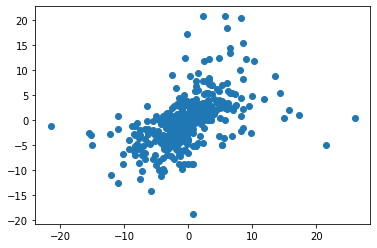

Correlation coeff of High vs Low 0.5063
High Vol period: High diff: mean=-0.282 stdv=4.398 skew=0.538 Kurtosis=5.487
High Vol period: Low Diff: mean=-0.223 stdv=4.484 skew=0.787 Kurtosis=4.099
Statistics=nan, pHigh=1.0000
Statistics=nan, pLow=1.0000
High Sample looks Gaussian (fail to reject H0)
Low Sample looks Gaussian (fail to reject H0)


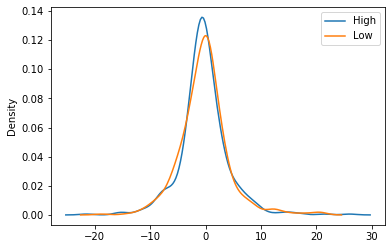

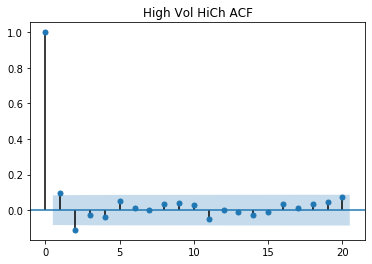

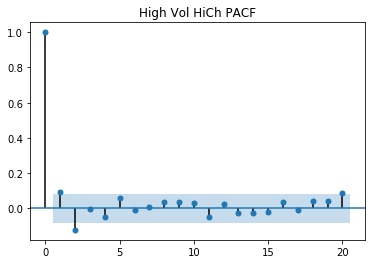

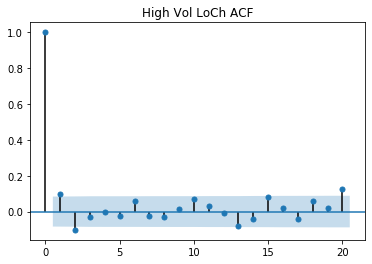

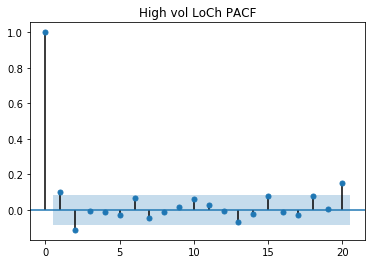

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:                    ARMA(14, 0)   Log Likelihood               -1591.495
Method:                       css-mle   S.D. of innovations              4.392
Date:                Sun, 06 Mar 2022   AIC                           3214.990
Time:                        20:50:06   BIC                           3283.920
Sample:                             0   HQIC                          3241.929
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2253      0.181     -1.246      0.213      -0.580       0.129
ar.L1.y        0.1105      0.043      2.590      0.010       0.027       0.194
ar.L2.y       -0.1104      0.043     -2.579      0.010      -0.194      -0.026
ar.L3.y       -0.0056      0.044     -0.128      0.898      -0.092       0.080
ar.L4.y       -0.0007      0.044     -0.016      0.987      -0.087       0.085
ar.L5.y       -0.0428      0.044     -0.977      0.329      -0.129       0.043
ar.L6.y        0.0700      0.044      1.595      0.111      -0.016       0.156
ar.L7.y       -0.0389      0.044     -0.883      0.377      -0.125       0.047
ar.L8.y       -0.0079      0.044     -0.180      0.857      -0.094       0.078
ar.L9.y        0.0095      0.044      0.215      0.829      -0.077       0.096
ar.L10.y       0.0564      0.044      1.285      0.199      -0.030       0.142
ar.L11.y       0.0171      0.044      0.389      0.697      -0.069       0.103
ar.L12.y      -0.0020      0.044     -0.045      0.964      -0.088       0.084
ar.L13.y      -0.0684      0.044     -1.562      0.118      -0.154       0.017
ar.L14.y      -0.0246      0.043     -0.567      0.571      -0.110       0.061
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.2015           -0.2619j            1.2297           -0.0342
AR.2             1.2015           +0.2619j            1.2297            0.0342
AR.3             0.9009           -0.7444j            1.1686           -0.1099
AR.4             0.9009           +0.7444j            1.1686            0.1099
AR.5             0.4252           -1.0676j            1.1491           -0.1897
AR.6             0.4252           +1.0676j            1.1491            0.1897
AR.7            -0.1499           -1.2436j            1.2526           -0.2691
AR.8            -0.1499           +1.2436j            1.2526            0.2691
AR.9            -0.6252           -1.0761j            1.2446           -0.3338
AR.10           -0.6252           +1.0761j            1.2446            0.3338
AR.11           -1.2354           -0.0000j            1.2354           -0.5000
AR.12           -1.1417           -0.7013j            1.3399           -0.4123
AR.13           -1.1417           +0.7013j            1.3399            0.4123
AR.14           -2.7602           -0.0000j            2.7602           -0.5000
------------------------------------------------------------------------------
"""

In [73]:

import sklearn
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import kurtosis, skew
#es5m_df.loc[es5m_df['Time'] > '10/12/2021 10:10']
new_es5m_df = es5m_df.copy()
voltimehigh = []; voltimelow = []
#Pick the High,Low prices in the 1st hour of US open i.e high volatility and liquidity,14:30 BST
#NOTE: We need to further consider the data from the SAME date only, as otherwise there'll be a jump between consecutive days
# Uncomment the for loop if you want to filter using traditional method
for i in range(len(new_es5m_df)-1):
    
    if (datetime.strptime(new_es5m_df.iloc[i]['Time'],'%m/%d/%Y %H:%M')).day == (datetime.strptime(new_es5m_df.iloc[i+1]['Time'],'%m/%d/%Y %H:%M')).day:
        rules = [datetime.strptime(new_es5m_df.iloc[i]['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M') > datetime.strptime('14:25','%H:%M'), 
            datetime.strptime(new_es5m_df.iloc[i]['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M') < datetime.strptime('21:05','%H:%M')
            ]
        if all(rules):
            #print(new_es5m_df.iloc[i]['Time'])
            voltimehigh.append(new_es5m_df.iloc[i+1]['High'] - new_es5m_df.iloc[i]['High'])
            voltimelow.append(new_es5m_df.iloc[i+1]['Low'] - new_es5m_df.iloc[i]['Low'])

# USE of MAP & (Nested)FILTER !!        
def mystrptime(x):
   return datetime.strptime(x[x.find(":")-2:],'%H:%M')

#x1 = map(mystrptime, new_es5m_df['Time'])
#print(list(x1))
#x = datetime.strptime(new_es5m_df['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M')
#y = filter(lambda x2: x2 < datetime.strptime('15:30','%H:%M'),filter(lambda x: (x > datetime.strptime('14:30','%H:%M')), x1))

#voltimehigh = filter(lambda s: s['Time']==map(mystrptime, y),new_es5m_df)
#print(list(voltimehigh))
        
#Plot the high volatile data
#High Low plot shows somehow Bi-Modal distribution(if we consider 1st hour of US opening)

data1 = voltimehigh; data2= voltimelow
#data1= pd.Series(voltimehigh).diff()
#data2= pd.Series(voltimelow).diff()
print('Length of data1 & data2 %i %i'% (len(data1),len(data2)))


pyplot.scatter(data1, data2)
pyplot.show()
print('Correlation coeff of High vs Low %.4f' % (np.corrcoef(data1,data2))[0,1])

sns.kdeplot(data1)
sns.kdeplot(data2)
plt.legend(labels = ['High','Low'])

#qqplot(data1, line='s')
#qqplot(data2, line='s')
#pyplot.show()

# Print the Mean, SD, Skewness & Kurtosis
print('High Vol period: High diff: mean=%.3f stdv=%.3f skew=%.3f Kurtosis=%.3f' % (np.mean(data1), np.std(data1),skew(data1),kurtosis(data1)))
print('High Vol period: Low Diff: mean=%.3f stdv=%.3f skew=%.3f Kurtosis=%.3f' % (np.mean(data2), np.std(data2),skew(data2),kurtosis(data2)))



#Now Test Normality
stath, p_high = shapiro(pd.Series(voltimehigh).diff())
statl, p_low = shapiro(pd.Series(voltimehigh).diff())
print('Statistics=%.3f, pHigh=%.4f' % (stath , p_high))
print('Statistics=%.3f, pLow=%.4f' % (statl , p_low))
# interpret
alpha = 0.05
if p_high > alpha:
    print('High Sample looks Gaussian (fail to reject H0)')
else:
    print('High Sample does not look Gaussian (reject H0)')
    
if p_low > alpha:
    print('Low Sample looks Gaussian (fail to reject H0)')
else:
    print('Low Sample does not look Gaussian (reject H0)')     
    
plot_acf(pd.Series(voltimehigh).dropna(),lags=20, title='High Vol HiCh ACF')
plot_pacf(pd.Series(voltimehigh).dropna(),lags=20, title = 'High Vol HiCh PACF')

plot_acf(pd.Series(voltimelow).dropna(),lags=20, title='High Vol LoCh ACF')
plot_pacf(pd.Series(voltimelow).dropna(),lags=20, title = 'High vol LoCh PACF')

plt.show()    

#The above plots shows appx an AR(1) model for HighChnage & significant lags at 7 & 14 for LowChange(as per PACF)
#Now Fit the Auto ARIMA model to validate

fit = ARIMA(voltimelow, order=(14,0,0)).fit()
fit.summary()

In [74]:
mytime = []
high = []
print(len(new_es5m_df['High'].diff()))
for i in range(len(new_es5m_df)-1):
    if (datetime.strptime(new_es5m_df.iloc[i]['Time'],'%m/%d/%Y %H:%M')).day == (datetime.strptime(new_es5m_df.iloc[i+1]['Time'],'%m/%d/%Y %H:%M')).day:
        mytime.append(new_es5m_df.iloc[i]['Time']) 
        high.append(new_es5m_df.iloc[i]['High'])
    
len(high)


981


975

# IMP !! Test of stationarity & AUTO_ARIMA
#Observations: High Model: SARIMAX(5, 0, 0) , Low Model:SARIMAX(7, 0, 0) OR Model:SARIMAX(11, 0, 0)
which shows , LOW has a greater Lag  than High in any case. 
The above Best Fit ARIMA values(5 & 7) on a 5 min chart kind of suggests significance of the last 30 mins for S&P.

TO BE SEEN: If the same significance is found for Nasdaq, Keeping in mind the Nasdaq Super 1 hr strat

In [75]:
# IMP !! Test of stionarity & AUTO_ARIMA

import sklearn
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller

# Split into Training & Test data: Use the Oct 2021 as Training to test Feb 2022 as Test(prob not ideal!,)
# Could use last week's data as test

voltimehigh_train = voltimehigh[:round(len(voltimehigh)/2)-1]
voltimehigh_test = voltimehigh[round(len(voltimehigh)/2)+1:]

voltimelow_train = voltimelow[:round(len(voltimelow)/2)+1]
voltimelow_test = voltimelow[round(len(voltimelow)/2)+1:]

highvolseries_train = pd.Series(voltimehigh_train).diff().dropna()    
lowvolseries_train = pd.Series(voltimelow_train).diff().dropna()


result = adfuller(lowvolseries)
print("********LOW CHANGE RESULT**********" )
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


#autoarimahigh = auto_arima(highvolseries,start_p=0,d=0,start_q=0,max_p=5,max_d=1,max_q=5 )   
#autoarimahigh.summary()

autoarimalow = auto_arima(lowvolseries_train,start_p=0,d=0,start_q=0,max_p=20,max_d=1,max_q=20,maxiter=50,alpha=0.05,n_jobs=-1 )   
print(autoarimalow.summary())

result = adfuller(highvolseries)
print("********HIGH CHANGE RESULT**********" )
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
autoarimahigh = auto_arima(highvolseries_train,start_p=0,d=0,start_q=0,max_p=20,max_d=1,max_q=20,maxiter=50,alpha=0.05,n_jobs=-1 )   
print(autoarimahigh.summary())

********LOW CHANGE RESULT**********
ADF Statistic: -10.622124
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\pmdarima\arima\_validation.py:77: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  274
Model:               SARIMAX(9, 0, 0)   Log Likelihood                -679.482
Date:                Sun, 06 Mar 2022   AIC                           1378.964
Time:                        20:58:48   BIC                           1415.095
Sample:                             0   HQIC                          1393.466
                                - 274                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8076      0.049    -16.315      0.000      -0.905      -0.711
ar.L2         -0.7385      0.069    -10.679      0.000      -0.874      -0.603
ar.L3         -0.5573      0.082     -6.807      0.0

C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\pmdarima\arima\_validation.py:77: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  272
Model:               SARIMAX(5, 0, 0)   Log Likelihood                -682.014
Date:                Sun, 06 Mar 2022   AIC                           1376.028
Time:                        20:58:51   BIC                           1397.663
Sample:                             0   HQIC                          1384.714
                                - 272                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7423      0.042    -17.856      0.000      -0.824      -0.661
ar.L2         -0.6022      0.047    -12.847      0.000      -0.694      -0.510
ar.L3         -0.3180      0.051     -6.271      0.0

In [30]:
highvolseries = pd.Series(voltimehigh).diff().dropna()    
#lowvolseries = pd.Series(voltimelow).diff().dropna()

result = adfuller(highvolseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
autoarimahigh = auto_arima(highvolseries,start_p=0,d=0,start_q=0,max_p=20,max_d=1,max_q=20 )   
autoarimahigh.summary()    

ADF Statistic: -6.463241
p-value: 0.000000
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  232
Model:               SARIMAX(6, 0, 0)   Log Likelihood                -474.532
Date:                Sat, 05 Mar 2022   AIC                            963.065
Time:                        21:59:15   BIC                            987.192
Sample:                             0   HQIC                           972.795
                                - 232                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6244      0.062    -10.115      0.000      -0.745      -0.503
ar.L2         -0.5926      0.079     -7.539      0.000      -0.747      -0.439
ar.L3         -0.5259      0.074     -7.143      0.000      -0.670      -0.382
ar.L4         -0.2712      0.082     -3.319      0.001      -0.431      -0.111
ar.L5         -0.1907      0.072     -2.641      0.008      -0.332      -0.049
ar.L6         -0.1282      0.070     -1.836      0.066      -0.265       0.009
sigma2         3.4867      0.276     12.629      0.000       2.946       4.028
===================================================================================
Ljung-Box (Q):                       47.66   Jarque-Bera (JB):                12.69
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               2.28   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
#Utility to compare extract & compare time, for purpose of extracting data in high volatile period
# re.search is not needed
import re
f=re.search("/",new_es5m_df.iloc[1]['Time'])
datetime.strptime(new_es5m_df.iloc[1]['Time'][new_es5m_df.iloc[1]['Time'].find(":")-2:] ,'%H:%M') > datetime.strptime('23:05','%H:%M')

False

# AWESOME USE of MAP & NESTED FILTER !!

In [1]:
new_es5m_df = es5m_df.copy()
#Try filter and Map function
# for i in range(len(new_es5m_df)):
#     rules = [datetime.strptime(new_es5m_df.iloc[i]['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M') > datetime.strptime('14:20','%H:%M'),
#             datetime.strptime(new_es5m_df.iloc[i]['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M') < datetime.strptime('21:05','%H:%M')]
#     if all(rules):
#         voltimehigh.append(new_es5m_df.iloc[i]['High'])
#         voltimelow.append(new_es5m_df.iloc[i]['Low'])
#Now try the above logic with filter function
def unfilter(x):
   x1 =  datetime.strftime(x,'%d %m %Y %H:%M')
   return x1[x1.find(":")-2:]

def mystrptime(x):
   return datetime.strptime(x[x.find(":")-2:],'%H:%M')

x1 = map(mystrptime, new_es5m_df['Time'])
#print(list(x1))
#x = datetime.strptime(new_es5m_df['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M')
y = filter(lambda x2: x2 < datetime.strptime('21:30','%H:%M'),filter(lambda x: (x > datetime.strptime('14:30','%H:%M')), x1))
y1 = map(unfilter, y)
print (list(y1))
y2 = filter(lambda rec: datetime.strptime(rec['Time'],'%H:%M')==y1,new_es5m_df)
print(type(y2))

NameError: name 'es5m_df' is not defined

In [61]:
x= 'hhhghg'
x[x.find('g'):]

'ghg'

In [44]:
type(new_es5m_df.iloc[1]['Time'])
datetime.datetime(1900, 1, 1, 14, 35) 

str

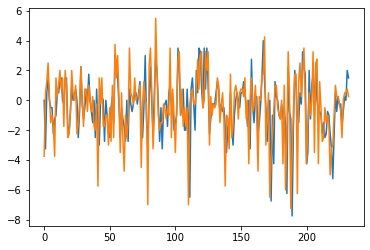

In [19]:
fithigh = ARIMA(data1, order=(1,0,1)).fit()
fithigh.summary()

plt.plot(data1)
plt.plot(data2)
plt.show()
#fitlow = ARIMA(data2, order=(0,0,14)).fit()
#fitlow.summary()

#Do auto_arima
arimaauto = auto_arima(voltimehigh,start_p=0,d=0)


In [37]:
# Check distribution of AR(1) time series params

es5m_df
#pd.Series(data1[1:]).plot()
#adf_test = ADFTest(alpha=0.05)
#adf_test.should_diff(data1[1:])


,Time,Open,High,Low,Close
0,10/06/2021 22:00,4355.25,4358.75,4355.00,4357.50
1,10/06/2021 22:05,4357.75,4358.00,4356.75,4357.25
2,10/06/2021 22:10,4357.50,4358.00,4356.75,4357.00
3,10/06/2021 22:15,4357.00,4362.25,4357.00,4362.00
4,10/06/2021 22:20,4362.00,4363.00,4360.25,4360.25
...,...,...,...,...,...
2068,03/04/2022 21:35,4322.50,4325.50,4321.00,4322.25
2069,03/04/2022 21:40,4322.25,4323.25,4321.50,4322.00
2070,03/04/2022 21:45,4322.25,4323.25,4320.00,4320.75
2071,03/04/2022 21:50,4321.00,4321.50,4319.50,4319.75
